# Context for AIC (ETL + Data Preparation)

## 1. Import Libraries

In [1]:
# Import Libraries
import re
import os
os.environ['USE_PYGEOS'] = '0'
import pandas as pd
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt
import geotable
from geopandas import GeoDataFrame
from shapely.geometry import Point
import seaborn as sns
import json
import numpy as np
import contextily as cx
import plotly.io as pio
import pingouin as pg

pio.renderers.default='notebook'

In [2]:
# path definition for each user - please edit to add new users
path_pb = "C:/Users/pauloricardolb/OneDrive - Universidade de Aveiro/TRABALHO_PROJETOS/AP01_ONGOING/POAT/SHARED_Andre"
path_al = "/Users/andresilvalima/Library/CloudStorage/OneDrive-UniversidadedeAveiro/SHARED_Andre"

In [3]:
# path definition
path = path_al

## 2. Check Data

### 2.1 PT2020_Operacoes_Resumo

In [4]:
# read data
xls = pd.ExcelFile(path + '/PT2020_Operacoes/PT2020_Resumo_PI-6.5_2023-05-03.xlsx')

In [5]:
# read data
OP_NOK = pd.read_excel(xls, 'P_6.5',dtype={'DICOFRE': str, 'DICO':str})

In [6]:
OP_NOK.head()

,Código da Operação | Operation Code,Programa Operacional | Operational Programme,Eixo Prioritário do PO | OP Priority Axis,% Cofinanciamento | % EU funding,Objetivo Temático | Thematic Objective,Prioridade de Investimento | Investment Priority,NIF | Tax Identification Number,Nome do Beneficiário | Beneficiary Name,Nome da Operação | Operation Name,Resumo | Summary,...,Aviso | Call,DICO,DICOFRE,DICO2,DICOFRE2,Concat_Concelho-Freguesia,População Concelho - Censos 2021,População Freguesia - Censos 2021,Fundo Total Aprovado Per Capita - Freguesia,Fundo Total Aprovado Per Capita - Concelho
0,CENTRO-07-2316-FEDER-000065,Programa Operacional Regional do Centro,07-Afirmar a sustentabilidade dos territórios ...,0.85,06 - Preservar e proteger o ambiente e promove...,05 - A adoção de medidas destinadas a melhorar...,507011937,MUNICÍPIO DE PEDRÓGÃO GRANDE,Requalificação do Recinto da Feira,A ação de requalificação do recinto da feira ...,...,CENTRO-16-2016-03,1013,101302,11013,1101302,pedrógão grandepedrógão grande,3390,2256,15.645319,10.411752
1,CENTRO-09-2316-FEDER-000188,Programa Operacional Regional do Centro,09-Reforçar a rede urbana (CIDADES),0.85,06 - Preservar e proteger o ambiente e promove...,05 - A adoção de medidas destinadas a melhorar...,505931192,MUNICÍPIO DE AVEIRO,Requalificação da Avenida Dr. Lourenço Peixinho,A Avenida caracteriza-se por uma construção d...,...,CENTRO-16-2018-05,0105,010517,10105,1010517,aveirounião das freguesias de glória e vera cruz,80954,21227,167.075862,43.809068
2,NORTE-04-2316-FEDER-000276,Programa Operacional Regional do Norte,04-Qualidade ambiental,0.85,06 - Preservar e proteger o ambiente e promove...,05 - A adoção de medidas destinadas a melhorar...,505985217,MUNICIPIO DE VIZELA,Requalificação do Espaço Público na Rua do Cal...,A intervenção que se propõe na Rua João Silva...,...,NORTE-16-2018-10,0314,031409,10314,1031409,vizelaunião das freguesias de tagilde e vizela...,23896,3360,34.526756,4.854783
3,NORTE-04-2316-FEDER-000090,Programa Operacional Regional do Norte,04-Qualidade ambiental,0.85,06 - Preservar e proteger o ambiente e promove...,05 - A adoção de medidas destinadas a melhorar...,506666018,MUNICÍPIO DE CARRAZEDA DE ANSIÃES,Requalificação da Praça do Município,A intervenção resume-sea modificação do pavim...,...,NORTE-16-2016-16,0403,040304,10403,1040304,carrazeda de ansiãescarrazeda de ansiães,5490,1706,34.738675,10.794933
4,NORTE-04-2316-FEDER-000343,Programa Operacional Regional do Norte,04-Qualidade ambiental,0.85,06 - Preservar e proteger o ambiente e promove...,05 - A adoção de medidas destinadas a melhorar...,506753905,MUNICÍPIO DE TAROUCA,Regeneração da zona Ribeirinha da Ucanha - Fa...,"A intervenção, aliada à fase 1, visa promover...",...,NORTE-16-2019-19,1820,182011,11820,1182011,taroucaunião das freguesias de gouviães e ucanha,7363,698,168.947736,16.015961


In [7]:
OP_NOK.columns

Index(['Código da Operação | Operation Code',
       'Programa Operacional | Operational Programme',
       'Eixo Prioritário do PO | OP Priority Axis',
       '% Cofinanciamento | % EU funding',
       'Objetivo Temático | Thematic Objective',
       'Prioridade de Investimento | Investment Priority',
       'NIF | Tax Identification Number',
       'Nome do Beneficiário | Beneficiary Name',
       'Nome da Operação | Operation Name', 'Resumo | Summary',
       'Despesas Elegíveis Totais Atribuídas à Operação | Total Eligible Expenditure Allocated to the Operation\n[€ - EUR]',
       'FEEI | ESI Fund',
       'Fundo Total Aprovado | Total Aproved Fund\n[€ - EUR]',
       'Data Início | Start Date ', 'Data Fim | Finish Date ',
       'País | Country', 'NUTS II | NUTS 2', 'NUTS III | NUTS 3',
       'Concelho | Municipality', 'Freguesia | Parrish',
       'Domínio Intervenção | Category of intervention', 'Aviso | Call',
       'DICO', 'DICOFRE', 'DICO2', 'DICOFRE2', 'Concat_Concelho-Fre

In [8]:
# filter df, keep only the columns we need
OP_NOK=OP_NOK[['Código da Operação | Operation Code','Nome da Operação | Operation Name','Fundo Total Aprovado | Total Aproved Fund\n[€ - EUR]','Data Início | Start Date ', 'Data Fim | Finish Date ','NUTS II | NUTS 2','NUTS III | NUTS 3','Concelho | Municipality','Freguesia | Parrish','DICO','DICOFRE']]

In [9]:
OP_NOK.head()

,Código da Operação | Operation Code,Nome da Operação | Operation Name,Fundo Total Aprovado | Total Aproved Fund\n[€ - EUR],Data Início | Start Date,Data Fim | Finish Date,NUTS II | NUTS 2,NUTS III | NUTS 3,Concelho | Municipality,Freguesia | Parrish,DICO,DICOFRE
0,CENTRO-07-2316-FEDER-000065,Requalificação do Recinto da Feira,35295.84,2016-08-05,2017-05-08,Centro,Região de Leiria,Pedrógão Grande,Pedrógão Grande,1013,101302
1,CENTRO-09-2316-FEDER-000188,Requalificação da Avenida Dr. Lourenço Peixinho,3546519.33,2020-07-27,2022-12-31,Centro,Região de Aveiro,Aveiro,União das freguesias de Glória e Vera Cruz,0105,010517
2,NORTE-04-2316-FEDER-000276,Requalificação do Espaço Público na Rua do Cal...,116009.90,2017-05-18,2020-05-31,Norte,Ave,Vizela,União das freguesias de Tagilde e Vizela (São ...,0314,031409
3,NORTE-04-2316-FEDER-000090,Requalificação da Praça do Município,59264.18,2017-04-26,2017-09-30,Norte,Douro,Carrazeda de Ansiães,Carrazeda de Ansiães,0403,040304
4,NORTE-04-2316-FEDER-000343,Regeneração da zona Ribeirinha da Ucanha - Fa...,117925.52,2020-05-01,2022-01-31,Norte,Douro,Tarouca,União das freguesias de Gouviães e Ucanha,1820,182011


In [10]:
list(OP_NOK.columns)

['Código da Operação | Operation Code',
 'Nome da Operação | Operation Name',
 'Fundo Total Aprovado | Total Aproved Fund\n[€ - EUR]',
 'Data Início | Start Date ',
 'Data Fim | Finish Date ',
 'NUTS II | NUTS 2',
 'NUTS III | NUTS 3',
 'Concelho | Municipality',
 'Freguesia | Parrish',
 'DICO',
 'DICOFRE']

In [11]:
# rename columns
OP_NOK.rename(columns={'Código da Operação | Operation Code':'CODE',
                       'Nome da Operação | Operation Name':'NOME',
                       'Fundo Total Aprovado | Total Aproved Fund\n[€ - EUR]':'VALOR',
                       'Data Início | Start Date ':'INICIO',
                       'Data Fim | Finish Date ':'FIM',
                       'NUTS II | NUTS 2':'NUTSII',
                       'NUTS III | NUTS 3':'NUTSIII',
                       'Concelho | Municipality':'MUNICIPIO',
                       'Freguesia | Parrish':'FREGUESIA'}, inplace=True)

In [12]:
OP_NOK.shape

(1441, 11)

In [13]:
# drop POSEUR PROJECTS (big investments, not relevant for this analysis - total 15)
OP_NOK=OP_NOK[OP_NOK['CODE'].str.contains("POSEUR")==False]

In [14]:
OP_NOK.shape

(1426, 11)

In [15]:
OP_NOK.dtypes

CODE                 object
NOME                 object
VALOR               float64
INICIO       datetime64[ns]
FIM          datetime64[ns]
NUTSII               object
NUTSIII              object
MUNICIPIO            object
FREGUESIA            object
DICO                 object
DICOFRE              object
dtype: object

### 2.2 CAOP2022

In [16]:
# load CAOP22
CAOP22=gpd.read_file(path_al + '/BD_Habita/CAOP_2022/Cont_AAD_CAOP2022.shp')

In [17]:
CAOP22.head()

,DICOFRE,Freguesia,Concelho,Distrito,TAA,Area_T_ha,Area_EA_ha,Des_Simpli,geometry
0,081504,Sagres,Vila do Bispo,Faro,ÁREA SECUNDÁRIA,3436.93,0.04,Sagres,"POLYGON ((-69674.530 -294276.294, -69681.011 -..."
1,081504,Sagres,Vila do Bispo,Faro,ÁREA SECUNDÁRIA,3436.93,0.17,Sagres,"POLYGON ((-69645.821 -294240.694, -69657.401 -..."
2,081504,Sagres,Vila do Bispo,Faro,ÁREA SECUNDÁRIA,3436.93,0.20,Sagres,"POLYGON ((-69720.371 -294162.995, -69715.271 -..."
3,081504,Sagres,Vila do Bispo,Faro,ÁREA SECUNDÁRIA,3436.93,0.09,Sagres,"POLYGON ((-70031.961 -294143.877, -70041.691 -..."
4,081504,Sagres,Vila do Bispo,Faro,ÁREA SECUNDÁRIA,3436.93,0.39,Sagres,"POLYGON ((-69800.002 -294108.296, -69796.762 -..."


### 2.3 BGRI21

In [18]:
# load BGRI21
BGRI21=gpd.read_file(path_al + '/BD_Habita/BGRI21_CONT/BGRI21_CONT.gpkg', layer='BGRI21_CONT')

In [19]:
BGRI21.head()

,OBJECTID,BGRI2021,DT21,DTMN21,DTMNFR21,DTMNFRSEC21,SECNUM21,SSNUM21,SECSSNUM21,SUBSECCAO,...,N_INDIVIDUOS_25_64,N_INDIVIDUOS_65_OU_MAIS,N_IND_ENSINO_BASICO_COMPLETO,N_IND_ENSINO_SEC_OU_POS_SEC_COMPLETO,N_IND_ENSINO_SUPERIOR_COMPLETO,N_IND_EMPREGADOS,N_IND_REFORMADOS,Shape_Length,Shape_Area,geometry
0,1,16101700125,16,1610,161017,161017001,001,25,00125,16101700125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2233.574667,1.548717e+05,"MULTIPOLYGON (((-46940.771 252330.622, -46904...."
1,2,16101900118,16,1610,161019,161019001,001,18,00118,16101900118,...,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1475.979773,6.907714e+04,"MULTIPOLYGON (((-49743.698 252577.047, -49741...."
2,3,16101900119,16,1610,161019,161019001,001,19,00119,16101900119,...,10.0,53.0,31.0,4.0,2.0,5.0,58.0,1310.420092,8.899950e+04,"MULTIPOLYGON (((-50405.542 252654.352, -50374...."
3,4,16101900204,16,1610,161019,161019002,002,04,00204,16101900204,...,6.0,7.0,6.0,5.0,2.0,6.0,7.0,456.251705,6.427454e+03,"MULTIPOLYGON (((-50454.163 252674.832, -50447...."
4,5,16100300101,16,1610,161003,161003001,001,01,00101,16100300101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6154.696498,1.163071e+06,"MULTIPOLYGON (((-44245.381 252435.906, -44243...."


In [20]:
# rename columns
BGRI21.rename(columns={'DTMNFR21':'DICOFRE','DTMN21':'DICO'}, inplace=True)

In [21]:
BGRI21.columns

Index(['OBJECTID', 'BGRI2021', 'DT21', 'DICO', 'DICOFRE', 'DTMNFRSEC21',
       'SECNUM21', 'SSNUM21', 'SECSSNUM21', 'SUBSECCAO', 'NUTS1', 'NUTS2',
       'NUTS3', 'N_EDIFICIOS_CLASSICOS', 'N_EDIFICIOS_CLASS_CONST_1_OU_2_ALOJ',
       'N_EDIFICIOS_CLASS_CONST_3_OU_MAIS_ALOJAMENTOS',
       'N_EDIFICIOS_EXCLUSIV_RESID', 'N_EDIFICIOS_1_OU_2_PISOS',
       'N_EDIFICIOS_3_OU_MAIS_PISOS', 'N_EDIFICIOS_CONSTR_ANTES_1945',
       'N_EDIFICIOS_CONSTR_1946_1980', 'N_EDIFICIOS_CONSTR_1981_2000',
       'N_EDIFICIOS_CONSTR_2001_2010', 'N_EDIFICIOS_CONSTR_2011_2021',
       'N_EDIFICIOS_COM_NECESSIDADES_REPARACAO', 'N_ALOJAMENTOS_TOTAL',
       'N_ALOJAMENTOS_FAMILIARES', 'N_ALOJAMENTOS_FAM_CLASS_RHABITUAL',
       'N_ALOJAMENTOS_FAM_CLASS_VAGOS_OU_RESID_SECUNDARIA',
       'N_RHABITUAL_ACESSIVEL_CADEIRAS_RODAS',
       'N_RHABITUAL_COM_ESTACIONAMENTO', 'N_RHABITUAL_PROP_OCUP',
       'N_RHABITUAL_ARRENDADOS', 'N_AGREGADOS_DOMESTICOS_PRIVADOS',
       'N_ADP_1_OU_2_PESSOAS', 'N_ADP_3_OU_MAIS_PESSO

In [22]:
# group total population by DICOFRE
BGRI21_FREG=BGRI21.groupby('DICOFRE', as_index=False)["N_INDIVIDUOS"].sum()

In [23]:
# group total population by DICO
BGRI21_MUN=BGRI21.groupby('DICO', as_index=False)["N_INDIVIDUOS"].sum()

### 2.4 Manually Georreferenced Data (kmz file)

In [24]:
# load manually the manually Georreferred points
MISSING=geotable.load(path + '/PT2020_Operacoes/GeoRef_POAT_Daniel.kmz')

In [25]:
MISSING.head()

,Name,geometry_object,geometry_layer,geometry_proj4
0,NORTE-04-2316-FEDER-000411,POINT Z (-8.144383867172305 41.63640397730045 0),GeoRef_POAT_Daniel,+proj=longlat +datum=WGS84 +no_defs
1,NORTE-04-2316-FEDER-000032,POINT Z (-8.581257553766305 41.76354649212521 0),GeoRef_POAT_Daniel,+proj=longlat +datum=WGS84 +no_defs
2,NORTE-05-2316-FEDER-000085,POINT Z (-8.398208455061493 41.38919962084599 0),GeoRef_POAT_Daniel,+proj=longlat +datum=WGS84 +no_defs
3,NORTE-04-2316-FEDER-000282,POINT Z (-8.472845952957801 41.46583903867823 0),GeoRef_POAT_Daniel,+proj=longlat +datum=WGS84 +no_defs
4,NORTE-04-2316-FEDER-000282,POINT Z (-8.294921635289064 41.2678640530865 0),GeoRef_POAT_Daniel,+proj=longlat +datum=WGS84 +no_defs


In [26]:
# delete unnecessary layer
MISSING=MISSING[MISSING['geometry_layer']!='Visita panorâmica']

In [27]:
# clean geometry object column
def extract_geometry(geometry_object):
    match = re.search(r'POINT Z \((-?\d+\.\d+) (-?\d+\.\d+)', geometry_object)
    if match:
        x, y = float(match.group(1)), float(match.group(2))
        return Point(x, y)
    else:
        print(f"Error in row: {geometry_object}")
        return None

In [28]:
# apply function
MISSING['geometry_object'] = MISSING['geometry_object'].astype(str)
MISSING['geometry'] = MISSING['geometry_object'].apply(extract_geometry)


In [29]:
# drop unnecessary columns
MISSING.drop(columns=['geometry_object','geometry_layer','geometry_proj4'], inplace=True)

In [30]:
# rename columns
MISSING.rename(columns={'name':'CODE'}, inplace=True)

In [31]:
# transform into geodataframe
MISSING=GeoDataFrame(MISSING, geometry='geometry')

In [32]:
# set CRS
MISSING.set_crs(epsg=4326, inplace=True)

,Name,geometry
0,NORTE-04-2316-FEDER-000411,POINT (-8.14438 41.63640)
1,NORTE-04-2316-FEDER-000032,POINT (-8.58126 41.76355)
2,NORTE-05-2316-FEDER-000085,POINT (-8.39821 41.38920)
3,NORTE-04-2316-FEDER-000282,POINT (-8.47285 41.46584)
4,NORTE-04-2316-FEDER-000282,POINT (-8.29492 41.26786)
...,...,...
178,NORTE-05-2316-FEDER-000033,POINT (-8.68010 41.17276)
179,ALT20-04-2316-FEDER-000041,POINT (-8.21415 38.64878)
180,ALT20-04-2316-FEDER-000057,POINT (-8.21701 38.64590)
181,NORTE-04-2316-FEDER-000073,POINT (-8.64215 42.02688)


In [33]:
# transform CRS
MISSING.to_crs(epsg=3763, inplace=True)

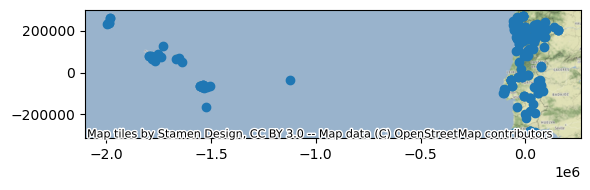

In [34]:
ax=MISSING.plot()
cx.add_basemap(ax,crs=MISSING.crs)

In [35]:
MISSING.head()

,Name,geometry
0,NORTE-04-2316-FEDER-000411,POINT (-939.486 218557.147)
1,NORTE-04-2316-FEDER-000032,POINT (-37266.686 232775.557)
2,NORTE-05-2316-FEDER-000085,POINT (-22172.541 191135.537)
3,NORTE-04-2316-FEDER-000282,POINT (-28381.712 199669.082)
4,NORTE-04-2316-FEDER-000282,POINT (-13558.929 177638.691)


### 2.5 Parrish Classification

In [36]:
# load parrish classification (Tipo de Transformação Urbana Predominante)
PARISH=pd.read_csv(path_al + '/PT2020_Operacoes/TransfUrbanas_Classifica_CAOP20_2882FREGs.csv', encoding='latin',delim_whitespace=True)

In [37]:
# select relevant columns
PARISH = PARISH[['DICOFRE18','FREG18_la','TU_FINAL_name']]

In [38]:
# rename columns
PARISH.rename(columns={'DICOFRE18':'DICOFRE','FREG18_la':'FREGUESIA','TU_FINAL_name':'TU'}, inplace=True)

In [39]:
PARISH.head()

,DICOFRE,FREGUESIA,TU
0,010103,Aguada de Cima,Contra-Urbanização
1,010109,Fermentelos,Suburbanização
2,010112,Macinhata do Vouga,Sem Classificação
3,010119,Valongo do Vouga,Declínio Rural
4,010121,União das freguesias de Águeda e Borralha,Consolidação Urbana


## 3. Combine Data, Calculate Stats

In [40]:
# join CAOP22 info to the MISSING dataframe
INFO=gpd.sjoin(MISSING, CAOP22[['Freguesia', 'DICOFRE', 'geometry']], how='left', predicate='intersects')

In [41]:
INFO.head()

,Name,geometry,index_right,Freguesia,DICOFRE
0,NORTE-04-2316-FEDER-000411,POINT (-939.486 218557.147),2841.0,Vieira do Minho,031120
1,NORTE-04-2316-FEDER-000032,POINT (-37266.686 232775.557),2993.0,Arca e Ponte de Lima,160752
2,NORTE-05-2316-FEDER-000085,POINT (-22172.541 191135.537),2517.0,Oliveira (São Mateus),031242
3,NORTE-04-2316-FEDER-000282,POINT (-28381.712 199669.082),2588.0,União das freguesias de Arnoso (Santa Maria e ...,031251
4,NORTE-04-2316-FEDER-000282,POINT (-13558.929 177638.691),2413.0,"União das freguesias de Cristelos, Boim e Ordem",130528


In [42]:
INFO.shape

(183, 5)

In [43]:
# drop unnecessary columns
INFO.drop(columns=['index_right'], inplace=True)

In [44]:
# rename columns
INFO.rename(columns={'Freguesia':'FREGUESIA', 'Name':'CODE'}, inplace=True)

In [45]:
INFO.head()

,CODE,geometry,FREGUESIA,DICOFRE
0,NORTE-04-2316-FEDER-000411,POINT (-939.486 218557.147),Vieira do Minho,031120
1,NORTE-04-2316-FEDER-000032,POINT (-37266.686 232775.557),Arca e Ponte de Lima,160752
2,NORTE-05-2316-FEDER-000085,POINT (-22172.541 191135.537),Oliveira (São Mateus),031242
3,NORTE-04-2316-FEDER-000282,POINT (-28381.712 199669.082),União das freguesias de Arnoso (Santa Maria e ...,031251
4,NORTE-04-2316-FEDER-000282,POINT (-13558.929 177638.691),"União das freguesias de Cristelos, Boim e Ordem",130528


In [46]:
OP_NOK.head()

,CODE,NOME,VALOR,INICIO,FIM,NUTSII,NUTSIII,MUNICIPIO,FREGUESIA,DICO,DICOFRE
0,CENTRO-07-2316-FEDER-000065,Requalificação do Recinto da Feira,35295.84,2016-08-05,2017-05-08,Centro,Região de Leiria,Pedrógão Grande,Pedrógão Grande,1013,101302
1,CENTRO-09-2316-FEDER-000188,Requalificação da Avenida Dr. Lourenço Peixinho,3546519.33,2020-07-27,2022-12-31,Centro,Região de Aveiro,Aveiro,União das freguesias de Glória e Vera Cruz,0105,010517
2,NORTE-04-2316-FEDER-000276,Requalificação do Espaço Público na Rua do Cal...,116009.90,2017-05-18,2020-05-31,Norte,Ave,Vizela,União das freguesias de Tagilde e Vizela (São ...,0314,031409
3,NORTE-04-2316-FEDER-000090,Requalificação da Praça do Município,59264.18,2017-04-26,2017-09-30,Norte,Douro,Carrazeda de Ansiães,Carrazeda de Ansiães,0403,040304
4,NORTE-04-2316-FEDER-000343,Regeneração da zona Ribeirinha da Ucanha - Fa...,117925.52,2020-05-01,2022-01-31,Norte,Douro,Tarouca,União das freguesias de Gouviães e Ucanha,1820,182011


In [47]:
# merge dataframes, transform OP_NOK to OP_OK (bring FREGUESIA and DECOFRE info)
OP_OK = pd.merge(OP_NOK, INFO[['CODE', 'FREGUESIA','DICOFRE']], on='CODE', how='left')
OP_OK['FREGUESIA_x'] = OP_OK['FREGUESIA_x'].where(OP_OK['FREGUESIA_x'] != 'ok', OP_OK['FREGUESIA_y'])
OP_OK = OP_OK.drop(columns=['FREGUESIA_y']).rename(columns={'FREGUESIA_x': 'FREGUESIA'})

In [48]:
OP_OK.shape

(1427, 12)

In [49]:
# filter na info for freguesia
OP_OK=OP_OK[OP_OK['FREGUESIA']!='na']

In [50]:
OP_OK.shape

(1353, 12)

In [51]:
# remove islands
OP_OK = OP_OK[(OP_OK['NUTSII'] != 'Região Autónoma dos Açores')] 
OP_OK = OP_OK[(OP_OK['NUTSII'] != 'Região Autónoma da Madeira')]

In [52]:
OP_OK.reset_index(drop=True, inplace=True)

In [53]:
OP_OK.shape

(1314, 12)

In [54]:
OP_OK.tail()

,CODE,NOME,VALOR,INICIO,FIM,NUTSII,NUTSIII,MUNICIPIO,FREGUESIA,DICO,DICOFRE_x,DICOFRE_y
1309,NORTE-04-2316-FEDER-000073,Requalificação Urbana da Área Central da Cidad...,446571.63,2016-05-02,2018-04-30,Norte,Alto Minho,Valença,"União das freguesias de Valença, Cristelo Covo...",1608,000000,160820
1310,NORTE-04-2316-FEDER-000452,Cerveira Palco das Artes,2121450.25,2022-03-01,2023-06-30,Norte,Alto Minho,Vila Nova de Cerveira,União das freguesias de Vila Nova de Cerveira ...,1610,161019,NaN
1311,NORTE-04-2316-FEDER-000114,"Qualificação Urbana da Praça da República, Inc...",462885.02,2018-12-01,2021-07-31,Norte,Terras de Trás-os-Montes,Vila Flor,União das freguesias de Vila Flor e Nabo,0410,041023,NaN
1312,CENTRO-07-2316-FEDER-000177,Reabilitação de Edifício Municipal para Espaço...,820116.57,2017-01-23,2022-12-31,Centro,Região de Coimbra,Tábua,Tábua,0616,000000,061614
1313,ALT20-04-2316-FEDER-000092,RECONVERSÃO DO ANTIGO EDIFICIO DO IVV PARA PAV...,4537925.80,2017-11-10,2022-12-31,Alentejo,Lezíria do Tejo,Almeirim,Almeirim,1403,140301,NaN


In [55]:
# correct DICOFRE, drop and rename columns
OP_OK['DICOFRE_x'] = OP_OK['DICOFRE_x'].where(OP_OK['DICOFRE_x'] != "000000", OP_OK['DICOFRE_y'])
OP_OK = OP_OK.drop(columns=['DICOFRE_y']).rename(columns={'DICOFRE_x': 'DICOFRE'})

In [56]:
OP_OK.head()

,CODE,NOME,VALOR,INICIO,FIM,NUTSII,NUTSIII,MUNICIPIO,FREGUESIA,DICO,DICOFRE
0,CENTRO-07-2316-FEDER-000065,Requalificação do Recinto da Feira,35295.84,2016-08-05,2017-05-08,Centro,Região de Leiria,Pedrógão Grande,Pedrógão Grande,1013,101302
1,CENTRO-09-2316-FEDER-000188,Requalificação da Avenida Dr. Lourenço Peixinho,3546519.33,2020-07-27,2022-12-31,Centro,Região de Aveiro,Aveiro,União das freguesias de Glória e Vera Cruz,0105,010517
2,NORTE-04-2316-FEDER-000276,Requalificação do Espaço Público na Rua do Cal...,116009.90,2017-05-18,2020-05-31,Norte,Ave,Vizela,União das freguesias de Tagilde e Vizela (São ...,0314,031409
3,NORTE-04-2316-FEDER-000090,Requalificação da Praça do Município,59264.18,2017-04-26,2017-09-30,Norte,Douro,Carrazeda de Ansiães,Carrazeda de Ansiães,0403,040304
4,NORTE-04-2316-FEDER-000343,Regeneração da zona Ribeirinha da Ucanha - Fa...,117925.52,2020-05-01,2022-01-31,Norte,Douro,Tarouca,União das freguesias de Gouviães e Ucanha,1820,182011


In [57]:
# merge tipo de transformação urbana predominante to the main dataframe OP_OK
OP_OK = pd.merge(OP_OK, PARISH[['DICOFRE','TU']], on='DICOFRE', how='left')

In [58]:
OP_OK.head()

,CODE,NOME,VALOR,INICIO,FIM,NUTSII,NUTSIII,MUNICIPIO,FREGUESIA,DICO,DICOFRE,TU
0,CENTRO-07-2316-FEDER-000065,Requalificação do Recinto da Feira,35295.84,2016-08-05,2017-05-08,Centro,Região de Leiria,Pedrógão Grande,Pedrógão Grande,1013,101302,Declínio Rural
1,CENTRO-09-2316-FEDER-000188,Requalificação da Avenida Dr. Lourenço Peixinho,3546519.33,2020-07-27,2022-12-31,Centro,Região de Aveiro,Aveiro,União das freguesias de Glória e Vera Cruz,0105,010517,Crescimento Urbano
2,NORTE-04-2316-FEDER-000276,Requalificação do Espaço Público na Rua do Cal...,116009.90,2017-05-18,2020-05-31,Norte,Ave,Vizela,União das freguesias de Tagilde e Vizela (São ...,0314,031409,Suburbanização
3,NORTE-04-2316-FEDER-000090,Requalificação da Praça do Município,59264.18,2017-04-26,2017-09-30,Norte,Douro,Carrazeda de Ansiães,Carrazeda de Ansiães,0403,040304,Consolidação Urbana
4,NORTE-04-2316-FEDER-000343,Regeneração da zona Ribeirinha da Ucanha - Fa...,117925.52,2020-05-01,2022-01-31,Norte,Douro,Tarouca,União das freguesias de Gouviães e Ucanha,1820,182011,Declínio Rural


In [59]:
# bring total population per parrish info to the main dataframe OP_OK
OP_OK=OP_OK.merge(BGRI21_FREG[['DICOFRE','N_INDIVIDUOS']], on='DICOFRE', how='left')

In [60]:
# rename columns
OP_OK.rename(columns={'N_INDIVIDUOS':'N_INDIVIDUOS_FREG'}, inplace=True)

In [61]:
# bring total population per municipality info to the main dataframe OP_OK
OP_OK=OP_OK.merge(BGRI21_MUN[['DICO','N_INDIVIDUOS']], on='DICO', how='left')

In [62]:
# rename columns
OP_OK.rename(columns={'N_INDIVIDUOS':'N_INDIVIDUOS_MUN'}, inplace=True)

In [63]:
OP_OK.head()

,CODE,NOME,VALOR,INICIO,FIM,NUTSII,NUTSIII,MUNICIPIO,FREGUESIA,DICO,DICOFRE,TU,N_INDIVIDUOS_FREG,N_INDIVIDUOS_MUN
0,CENTRO-07-2316-FEDER-000065,Requalificação do Recinto da Feira,35295.84,2016-08-05,2017-05-08,Centro,Região de Leiria,Pedrógão Grande,Pedrógão Grande,1013,101302,Declínio Rural,2256.0,3390.0
1,CENTRO-09-2316-FEDER-000188,Requalificação da Avenida Dr. Lourenço Peixinho,3546519.33,2020-07-27,2022-12-31,Centro,Região de Aveiro,Aveiro,União das freguesias de Glória e Vera Cruz,0105,010517,Crescimento Urbano,21227.0,80954.0
2,NORTE-04-2316-FEDER-000276,Requalificação do Espaço Público na Rua do Cal...,116009.90,2017-05-18,2020-05-31,Norte,Ave,Vizela,União das freguesias de Tagilde e Vizela (São ...,0314,031409,Suburbanização,3360.0,23896.0
3,NORTE-04-2316-FEDER-000090,Requalificação da Praça do Município,59264.18,2017-04-26,2017-09-30,Norte,Douro,Carrazeda de Ansiães,Carrazeda de Ansiães,0403,040304,Consolidação Urbana,1706.0,5490.0
4,NORTE-04-2316-FEDER-000343,Regeneração da zona Ribeirinha da Ucanha - Fa...,117925.52,2020-05-01,2022-01-31,Norte,Douro,Tarouca,União das freguesias de Gouviães e Ucanha,1820,182011,Declínio Rural,698.0,7363.0


In [64]:
# bring geometry info and create dataframe OP_FREG
OP_FREG=OP_OK.merge(CAOP22[['DICOFRE','geometry']], on='DICOFRE', how='left')

In [65]:
# create dataframe OP_FREG
OP_FREG=GeoDataFrame(OP_FREG, geometry='geometry')

In [66]:
OP_FREG.head()

,CODE,NOME,VALOR,INICIO,FIM,NUTSII,NUTSIII,MUNICIPIO,FREGUESIA,DICO,DICOFRE,TU,N_INDIVIDUOS_FREG,N_INDIVIDUOS_MUN,geometry
0,CENTRO-07-2316-FEDER-000065,Requalificação do Recinto da Feira,35295.84,2016-08-05,2017-05-08,Centro,Região de Leiria,Pedrógão Grande,Pedrógão Grande,1013,101302,Declínio Rural,2256.0,3390.0,"POLYGON ((-1792.641 40327.414, -1799.451 40313..."
1,CENTRO-09-2316-FEDER-000188,Requalificação da Avenida Dr. Lourenço Peixinho,3546519.33,2020-07-27,2022-12-31,Centro,Região de Aveiro,Aveiro,União das freguesias de Glória e Vera Cruz,0105,010517,Crescimento Urbano,21227.0,80954.0,"POLYGON ((-44040.806 112457.327, -44022.764 11..."
2,NORTE-04-2316-FEDER-000276,Requalificação do Espaço Público na Rua do Cal...,116009.90,2017-05-18,2020-05-31,Norte,Ave,Vizela,União das freguesias de Tagilde e Vizela (São ...,0314,031409,Suburbanização,3360.0,23896.0,"POLYGON ((-10568.532 191703.440, -10543.163 19..."
3,NORTE-04-2316-FEDER-000090,Requalificação da Praça do Município,59264.18,2017-04-26,2017-09-30,Norte,Douro,Carrazeda de Ansiães,Carrazeda de Ansiães,0403,040304,Consolidação Urbana,1706.0,5490.0,"POLYGON ((70875.998 177853.975, 70889.408 1778..."
4,NORTE-04-2316-FEDER-000343,Regeneração da zona Ribeirinha da Ucanha - Fa...,117925.52,2020-05-01,2022-01-31,Norte,Douro,Tarouca,União das freguesias de Gouviães e Ucanha,1820,182011,Declínio Rural,698.0,7363.0,"POLYGON ((31787.872 155548.711, 31821.042 1555..."


In [67]:
# add column for investment per capita per parrish
OP_FREG['INV_PC_FREG']=OP_FREG['VALOR']/OP_FREG['N_INDIVIDUOS_FREG']


In [93]:
# copy dataframe
OP_MUN=OP_FREG.copy()

In [94]:
# dissolve by DICOFRE to get municipality level
OP_MUN=OP_MUN.dissolve(by='DICOFRE', as_index=False)

In [95]:
# calculate investment per capita per municipality
OP_MUN['INV_PC_MUN']=OP_MUN['VALOR']/OP_MUN['N_INDIVIDUOS_MUN']

## 4. Visualizations and Tests

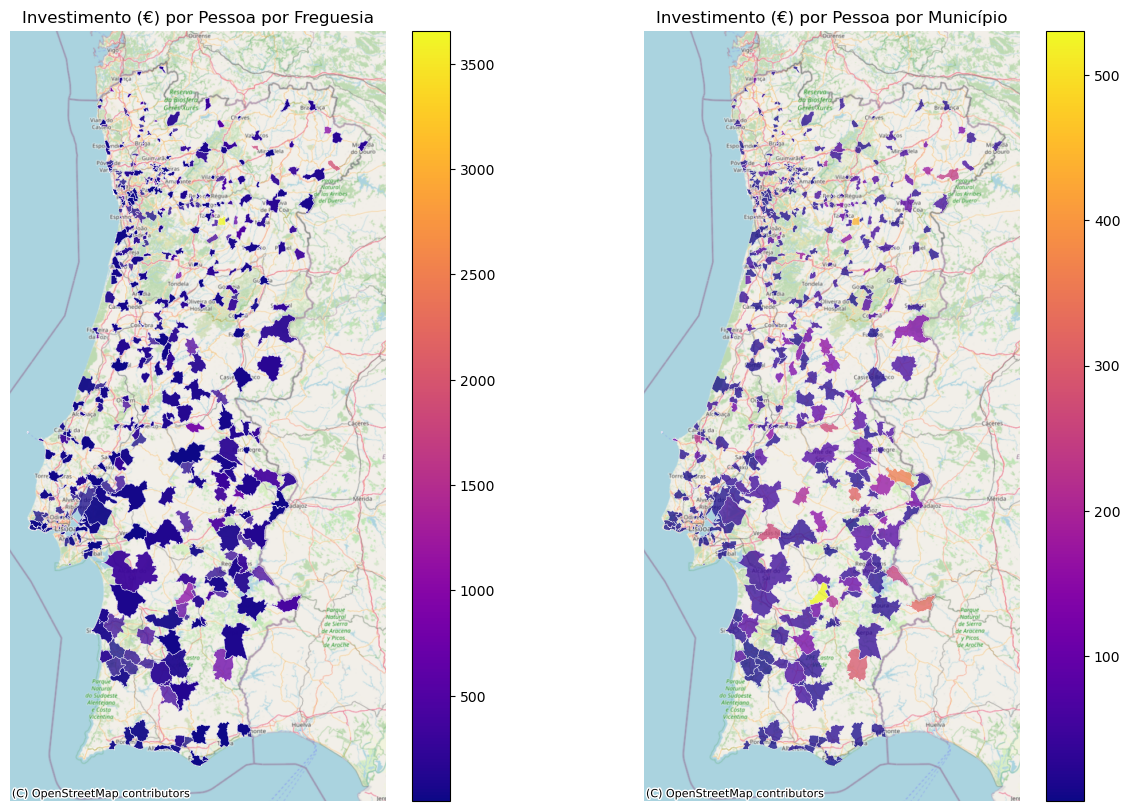

In [96]:
# visualize data
f, axs = plt.subplots(1, 2, figsize=(15, 10), sharex=True, sharey=True)
ax1, ax2 = axs

OP_FREG.plot(
    column='INV_PC_FREG',
    cmap='plasma',
    edgecolor='white',
    linewidth=0.3,
    alpha=0.75,
    legend=True,
    ax=ax1
)
ax1.set_axis_off()
cx.add_basemap(ax1,crs=OP_FREG.crs,source=cx.providers.OpenStreetMap.Mapnik)
ax1.set_title("Investimento (€) por Pessoa por Freguesia")

OP_MUN.plot(
    column='INV_PC_MUN',
    cmap='plasma',
    edgecolor='white',
    linewidth=0.3,
    alpha=0.75,
    legend=True,
    ax=ax2
)
ax2.set_axis_off()
cx.add_basemap(ax2,crs=OP_MUN.crs,source=cx.providers.OpenStreetMap.Mapnik)
ax2.set_title("Investimento (€) por Pessoa por Município")


plt.show()

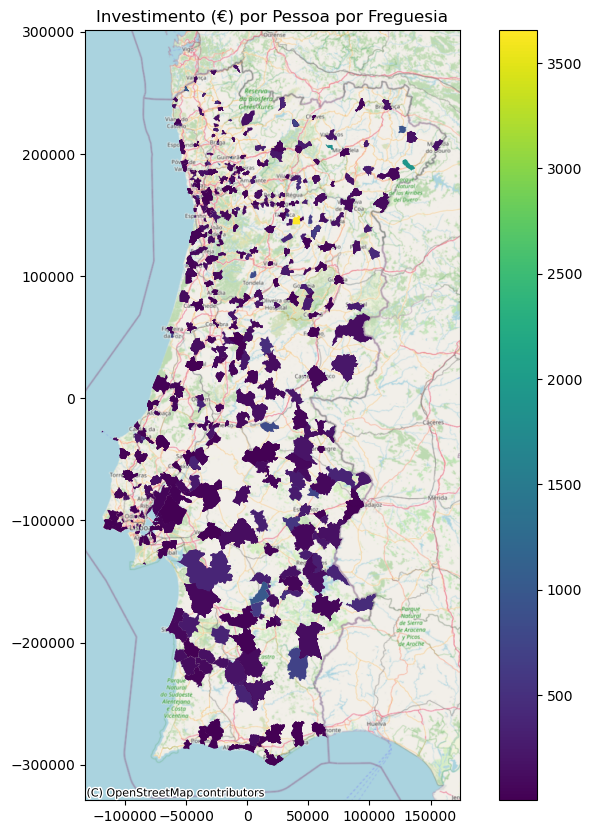

In [97]:
# visualize data
ax=OP_FREG.plot(column="INV_PC_FREG",figsize=(10,10),legend=True, cmap='viridis')
plt.title('Investimento (€) por Pessoa por Freguesia')
cx.add_basemap(ax,crs=OP_FREG.crs,source=cx.providers.OpenStreetMap.Mapnik)

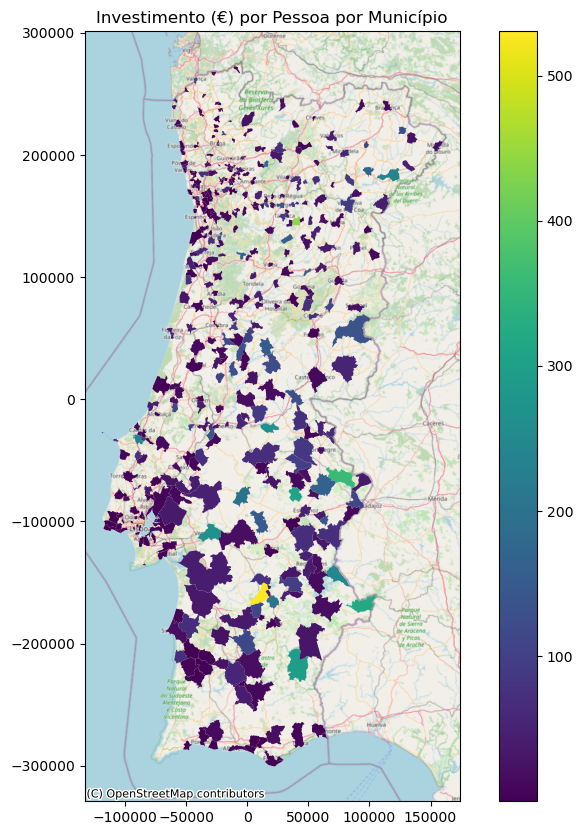

In [98]:
# visualize data
ax=OP_MUN.plot(column="INV_PC_MUN",figsize=(10,10),legend=True)
plt.title('Investimento (€) por Pessoa por Município')
cx.add_basemap(ax,crs=OP_MUN.crs,source=cx.providers.OpenStreetMap.Mapnik)

In [99]:
# sort by investment per capita per parrish
CHECK_OP_FREG=OP_FREG.sort_values(by='INV_PC_FREG', ascending=False)

In [100]:
# filter columns
CHECK_OP_FREG=CHECK_OP_FREG[['CODE','FREGUESIA','TU','VALOR','N_INDIVIDUOS_FREG','INV_PC_FREG']]

In [101]:
CHECK_OP_FREG.head(10)

,CODE,FREGUESIA,TU,VALOR,N_INDIVIDUOS_FREG,INV_PC_FREG
322,NORTE-04-2316-FEDER-000272,Leomil,Declínio Rural,4134005.73,1131.0,3655.177480
1154,NORTE-04-2316-FEDER-000475,"União das freguesias de Brunhozinho, Castanhei...",Declínio Rural,410474.10,216.0,1900.343056
1543,NORTE-04-2316-FEDER-000260,Veiga de Lila,Declínio Rural,421027.39,233.0,1806.984506
1542,NORTE-05-2316-FEDER-000056,"União das freguesias de Oliveira, São Paio e S...",Declínio Urbano,10360462.84,7830.0,1323.175331
1657,NORTE-04-2316-FEDER-000452,União das freguesias de Vila Nova de Cerveira ...,Suburbanização,2121450.25,1780.0,1191.825983
18,NORTE-05-2316-FEDER-000085,Oliveira (São Mateus),Declínio Urbano,2772960.08,2418.0,1146.799041
1238,ALT20-08-2316-FEDER-000015,Alvito,Declínio Rural,1209467.00,1196.0,1011.260033
1001,NORTE-04-2316-FEDER-000455,Argozelo,Declínio Rural,530527.47,560.0,947.370482
661,ALT20-08-2316-FEDER-000105,Santo António das Areias,Declínio Rural,849219.56,961.0,883.683205
514,ALT20-08-2316-FEDER-000068,União das freguesias de Gavião e Atalaia,Declínio Rural,1257190.36,1501.0,837.568528


In [102]:
# sort by investment per capita per municipality
CHECK_OP_MUN=OP_MUN.sort_values(by='INV_PC_MUN', ascending=False)

In [103]:
# filter columns
CHECK_OP_MUN=CHECK_OP_MUN[['CODE','MUNICIPIO','TU','VALOR','N_INDIVIDUOS_MUN','INV_PC_MUN']]

In [104]:
CHECK_OP_MUN.head(10)

,CODE,MUNICIPIO,TU,VALOR,N_INDIVIDUOS_MUN,INV_PC_MUN
30,ALT20-08-2316-FEDER-000015,Alvito,Declínio Rural,1209467.00,2280.0,530.467982
374,NORTE-04-2316-FEDER-000272,Moimenta da Beira,Declínio Rural,4134005.73,9410.0,439.320481
226,ALT20-08-2316-FEDER-000095,Arronches,Declínio Rural,1000000.00,2789.0,358.551452
31,ALT20-08-2316-FEDER-000025,Barrancos,Declínio Rural,461116.51,1438.0,320.665167
244,ALT20-08-2316-FEDER-000091,Sousel,Declínio Rural,1350000.00,4360.0,309.633028
40,ALT20-08-2316-FEDER-000036,Mértola,Declínio Rural,1821300.00,6206.0,293.474057
144,ALT20-04-2316-FEDER-000135,Vendas Novas,Consolidação Urbana,3005289.62,11245.0,267.255635
236,ALT20-08-2316-FEDER-000071,Gavião,Declínio Rural,892881.44,3394.0,263.076441
135,ALT20-08-2316-FEDER-000003,Mourão,Declínio Rural,584235.67,2351.0,248.505177
88,NORTE-04-2316-FEDER-000198,Mogadouro,Declínio Rural,1987218.28,8301.0,239.395046


In [105]:
# kruskal wallis test for parrish dataset
pg.kruskal(data=OP_FREG, dv='INV_PC_FREG', between='TU')

,Source,ddof1,H,p-unc
Kruskal,TU,6,435.309682,7.115427e-91


In [106]:
# kruskal wallis test for municipality dataset
pg.kruskal(data=OP_FREG, dv='VALOR', between='TU')

,Source,ddof1,H,p-unc
Kruskal,TU,6,51.845343,2.003235e-09


In [107]:
# pairwise test for parrish dataset
pg.pairwise_tests(dv='INV_PC_FREG', between='TU', data=OP_FREG, parametric=False).round(3)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,hedges
0,TU,Consolidação Urbana,Contra-Urbanização,False,False,18328.0,two-sided,0.000,-0.681
1,TU,Consolidação Urbana,Crescimento Urbano,False,False,123247.0,two-sided,0.000,0.254
2,TU,Consolidação Urbana,Declínio Rural,False,False,26016.0,two-sided,0.000,-0.807
3,TU,Consolidação Urbana,Declínio Urbano,False,False,14995.0,two-sided,0.000,-0.664
4,TU,Consolidação Urbana,Sem Classificação,False,False,21659.0,two-sided,0.000,-0.623
5,TU,Consolidação Urbana,Suburbanização,False,False,28321.0,two-sided,0.000,-0.459
6,TU,Contra-Urbanização,Crescimento Urbano,False,False,34639.0,two-sided,0.000,0.997
7,TU,Contra-Urbanização,Declínio Rural,False,False,11748.0,two-sided,0.000,-0.348
8,TU,Contra-Urbanização,Declínio Urbano,False,False,5476.0,two-sided,0.043,-0.072
9,TU,Contra-Urbanização,Sem Classificação,False,False,8801.0,two-sided,0.646,0.050


In [108]:
# pairwise test for municipality dataset
pg.pairwise_tests(dv='VALOR', between='TU', data=OP_FREG, parametric=False).round(3)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,hedges
0,TU,Consolidação Urbana,Contra-Urbanização,False,False,39262.0,two-sided,0.002,0.330
1,TU,Consolidação Urbana,Crescimento Urbano,False,False,103980.0,two-sided,0.144,-0.029
2,TU,Consolidação Urbana,Declínio Rural,False,False,78629.5,two-sided,0.035,0.219
3,TU,Consolidação Urbana,Declínio Urbano,False,False,14152.0,two-sided,0.000,-0.816
4,TU,Consolidação Urbana,Sem Classificação,False,False,42128.0,two-sided,0.191,0.125
5,TU,Consolidação Urbana,Suburbanização,False,False,40863.0,two-sided,0.577,-0.075
6,TU,Contra-Urbanização,Crescimento Urbano,False,False,19454.0,two-sided,0.155,-0.306
7,TU,Contra-Urbanização,Declínio Rural,False,False,14248.0,two-sided,0.174,-0.149
8,TU,Contra-Urbanização,Declínio Urbano,False,False,2210.0,two-sided,0.000,-0.623
9,TU,Contra-Urbanização,Sem Classificação,False,False,7634.0,two-sided,0.147,-0.247


In [117]:
# filter extreme outliers
OP_FREG_NO_OUTLIER=OP_FREG[OP_FREG['INV_PC_FREG']<OP_FREG['INV_PC_FREG'].quantile(0.999)]

In [118]:
# visualize data
fig = px.box(OP_FREG_NO_OUTLIER,
             y="INV_PC_FREG", 
             x="TU", 
             points="all",
             color="TU")

fig.update_layout(width=1200, height=400,
    yaxis_title='Valor Total Investido (€ / Per Capita)',
    xaxis_title='Processo de Transformação Urbana Dominante')

fig.show()

In [119]:
# filter extreme outliers
OP_FREG_NO_OUTLIER=OP_FREG[OP_FREG['VALOR']<OP_FREG['VALOR'].quantile(0.999)]

In [120]:
# visualize data
fig = px.box(OP_FREG_NO_OUTLIER, 
             y="VALOR", 
             x="TU", 
             points="all",
             color="TU")

fig.update_layout(width=1200, height=400,
    yaxis_title='Valor Total Investido (€)',
    xaxis_title='Processo de Transformação Urbana Dominante')

fig.show()

In [121]:
# get a pivot table with mean values for investment per capita per type of parrish (TU)
A=pd.pivot_table(OP_FREG, values=['INV_PC_FREG','VALOR'], index=['TU'], aggfunc=np.mean, sort=True).round(0)
A.sort_values(by='INV_PC_FREG', ascending=False)

,INV_PC_FREG,VALOR
TU,,
Declínio Rural,209.0,402691.0
Declínio Urbano,126.0,1436961.0
Contra-Urbanização,114.0,339402.0
Sem Classificação,109.0,451381.0
Suburbanização,99.0,571043.0
Consolidação Urbana,54.0,524228.0
Crescimento Urbano,35.0,543394.0


In [122]:
# filter for Aveiro
AVEIRO=OP_FREG[OP_FREG['DICOFRE']=='010517']

In [123]:
# filter columns
AVEIRO=AVEIRO[['CODE','NOME','VALOR','INICIO','FIM','MUNICIPIO','FREGUESIA','DICO','DICOFRE','TU']]

In [124]:
# sort by finish date (ascending)
AVEIRO.sort_values(by='FIM', ascending=True)

,CODE,NOME,VALOR,INICIO,FIM,MUNICIPIO,FREGUESIA,DICO,DICOFRE,TU
567,CENTRO-09-2316-FEDER-000026,Requalificação da Rua de José Estêvão e Ruas A...,180266.97,2016-06-20,2017-03-31,Aveiro,União das freguesias de Glória e Vera Cruz,0105,010517,Crescimento Urbano
547,CENTRO-09-2316-FEDER-000055,Qualificação da Ponte de São João,599997.25,2016-12-30,2018-05-31,Aveiro,União das freguesias de Glória e Vera Cruz,0105,010517,Crescimento Urbano
68,CENTRO-09-2316-FEDER-000191,Qualificação da Rua da Pega,1450895.96,2019-10-08,2021-06-30,Aveiro,União das freguesias de Glória e Vera Cruz,0105,010517,Crescimento Urbano
720,CENTRO-09-2316-FEDER-000110,Reabilitação do edifício Fernando Távora,1262251.73,2017-05-15,2021-08-31,Aveiro,União das freguesias de Glória e Vera Cruz,0105,010517,Crescimento Urbano
721,CENTRO-09-2316-FEDER-000109,Reabilitação do edifício da antiga Estação de ...,634320.13,2017-11-17,2021-08-31,Aveiro,União das freguesias de Glória e Vera Cruz,0105,010517,Crescimento Urbano
564,CENTRO-09-2316-FEDER-000159,"Reabilitação das Ruas do Gravito, Carmo e Almi...",467959.34,2019-06-15,2022-03-31,Aveiro,União das freguesias de Glória e Vera Cruz,0105,010517,Crescimento Urbano
1,CENTRO-09-2316-FEDER-000188,Requalificação da Avenida Dr. Lourenço Peixinho,3546519.33,2020-07-27,2022-12-31,Aveiro,União das freguesias de Glória e Vera Cruz,0105,010517,Crescimento Urbano
565,CENTRO-09-2316-FEDER-000237,Requalificação da Praça Dr. Ferreira Soares,128272.10,2021-06-08,2022-12-31,Aveiro,União das freguesias de Glória e Vera Cruz,0105,010517,Crescimento Urbano
80,CENTRO-09-2316-FEDER-000192,Requalificação do Largo do Rossio e área envol...,2051423.31,2021-06-01,2023-03-31,Aveiro,União das freguesias de Glória e Vera Cruz,0105,010517,Crescimento Urbano
